<a href="https://colab.research.google.com/github/Rish1941/Formula-One-Prediction/blob/main/Rishabh_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import scipy.stats as stats

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Exploring the Data by initializing all dataframes

In [ ]:
circuits = pd.read_csv("/content/drive/MyDrive/SA Project/F1/circuits.csv")
constructor_results = pd.read_csv("/content/drive/MyDrive/SA Project/F1/constructor_results.csv")
constructor_standings = pd.read_csv("/content/drive/MyDrive/SA Project/F1/constructor_standings.csv")
constructors = pd.read_csv("/content/drive/MyDrive/SA Project/F1/constructors.csv")
driver_standings = pd.read_csv("/content/drive/MyDrive/SA Project/F1/driver_standings.csv")
drivers = pd.read_csv("/content/drive/MyDrive/SA Project/F1/drivers.csv")
lap_times = pd.read_csv("/content/drive/MyDrive/SA Project/F1/lap_times.csv")
pit_stopes = pd.read_csv("/content/drive/MyDrive/SA Project/F1/pit_stops.csv")
qualifying = pd.read_csv("/content/drive/MyDrive/SA Project/F1/qualifying.csv")
races = pd.read_csv("/content/drive/MyDrive/SA Project/F1/races.csv")
results = pd.read_csv("/content/drive/MyDrive/SA Project/F1/results.csv")
seasons = pd.read_csv("/content/drive/MyDrive/SA Project/F1/seasons.csv")
sprint_results = pd.read_csv("/content/drive/MyDrive/SA Project/F1/sprint_results.csv")
status = pd.read_csv("/content/drive/MyDrive/SA Project/F1/status.csv")

In [ ]:
races["url"][1]

'http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix'

Modifying Results DataFrame by adding position and winner column to it

In [ ]:
driver_race_data = results[["raceId","driverId","constructorId","grid","position", "points", "milliseconds"]].copy()
driver_race_data = driver_race_data[driver_race_data["position"]!="\\N"]
driver_race_data["position"] = [int(i) for i in driver_race_data["position"]]
driver_race_data["winner"] = np.where(driver_race_data["position"]==1,1,0)
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner
0,18,1,1,1,1,10.0,5690616,1
1,18,2,2,5,2,8.0,5696094,0
2,18,3,3,7,3,6.0,5698779,0
3,18,4,4,11,4,5.0,5707797,0
4,18,5,1,3,5,4.0,5708630,0
...,...,...,...,...,...,...,...,...
25414,1074,846,1,13,15,0.0,5909919,0
25415,1074,849,3,20,16,0.0,5915379,0
25416,1074,807,117,17,17,0.0,5917413,0
25417,1074,815,9,4,18,0.0,\N,0


In [ ]:
## removing bad race data
driver_race_data = driver_race_data[(driver_race_data["raceId"]!=780)&(driver_race_data["raceId"]!=784)&(driver_race_data["raceId"]!=828)]
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner
0,18,1,1,1,1,10.0,5690616,1
1,18,2,2,5,2,8.0,5696094,0
2,18,3,3,7,3,6.0,5698779,0
3,18,4,4,11,4,5.0,5707797,0
4,18,5,1,3,5,4.0,5708630,0
...,...,...,...,...,...,...,...,...
25414,1074,846,1,13,15,0.0,5909919,0
25415,1074,849,3,20,16,0.0,5915379,0
25416,1074,807,117,17,17,0.0,5917413,0
25417,1074,815,9,4,18,0.0,\N,0


In [ ]:
df_driver_standings = driver_standings[["raceId","driverId"]].copy()


In [ ]:
# Creating model database
#df_driver_standings = driver_standings[["raceId","constructorId","driverId"]].copy()
df_driver_standings

,raceId,driverId
0,18,1
1,18,2
2,18,3
3,18,4
4,18,5
...,...,...
33430,87,42
33431,88,38
33432,88,42
33433,89,38


Merging Results Data Frame and race, team, date and circuit data

In [ ]:
race_team_date_ckt = driver_race_data.merge(races, left_on="raceId", right_on="raceId", how="left")
race_team_date_ckt = race_team_date_ckt.merge(circuits[["circuitId","name"]], on ="circuitId",how="left" )
race_team_date_ckt

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name_x,date,time,url,name_y
0,18,1,1,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Albert Park Grand Prix Circuit
1,18,2,2,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Albert Park Grand Prix Circuit
2,18,3,3,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Albert Park Grand Prix Circuit
3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Albert Park Grand Prix Circuit
4,18,5,1,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,1074,846,1,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,Bahrain International Circuit
14595,1074,849,3,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,Bahrain International Circuit
14596,1074,807,117,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,Bahrain International Circuit
14597,1074,815,9,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,Bahrain International Circuit


In [ ]:
# merging race score data to the data
driver_race_data = driver_race_data.merge(races, on="raceId", how="left")
driver_race_data

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name,date,time,url
0,18,1,1,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,18,2,2,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,18,3,3,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,18,5,1,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,1074,846,1,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14595,1074,849,3,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14596,1074,807,117,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14597,1074,815,9,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...


In [ ]:
df0 = driver_race_data
df0

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name,date,time,url
0,18,1,1,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,18,2,2,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,18,3,3,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,18,5,1,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,1074,846,1,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14595,1074,849,3,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14596,1074,807,117,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14597,1074,815,9,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...


Getting a column specifying podium finishers in a race i.e. first 3 drivers

In [ ]:
df1 = df0.copy()
podium = []
for i in df1["position"]:
  if (i==1)|(i==2)|(i==3):
    podium.append(1)
  else:
    podium.append(0)

df1["podium"] = podium
df1

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name,date,time,url,podium
0,18,1,1,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1
1,18,2,2,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1
2,18,3,3,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1
3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
4,18,5,1,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,1074,846,1,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0
14595,1074,849,3,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0
14596,1074,807,117,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0
14597,1074,815,9,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0


In [ ]:
df1["date"] = pd.to_datetime(df1["date"], infer_datetime_format=True)
df1["pole_position"] = np.where(df1["grid"]==1,1,0)
df2 = df1.copy()
# df2 is base data frame for the n-year function

Following cells have functions to develop a past n year dataframe, this dataframe was used to ceollect past n year data for different teams in columns. Past n year data is assumed to be a good predictor of performance

In [ ]:

def total_n_years_podium(x,df=df1,n=2):
  dfz = df[(df["date"]<=x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_pods = dfz["podium"].sum()
  return past_pods
## This for model 1 dataframe
# Past n year podium for each constructor
# Past n year points
# Past n year wins
# Past n year polls (1st grid position)
# Past n year podium for each driver

## Model 2 dataframe
# 


In [ ]:
# function
# Optimal value of n to increase accuarcy
# r_final 

In [ ]:
# Past n year points
def total_n_years_points(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_points = dfz["points"].sum()
  return past_points
def total_n_years_points_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_points = dfz["points"].sum()
  return past_points

def total_n_years_races(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_races = len(dfz["raceId"].unique())
  return past_races

def total_n_years_races_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_races = len(dfz["raceId"].unique())
  return past_races

def total_n_years_avg_pos(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_pos = dfz["position"].sum()/len(dfz)
  return past_pos

def total_n_years_avg_pos_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_pos = dfz["position"].sum()/len(dfz)
  return past_pos


In [ ]:
# Past n year wins
def total_n_years_wins(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_wins = dfz["winner"].sum()
  return past_wins

def total_n_years_wins_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_wins = dfz["winner"].sum()
  return past_wins


In [ ]:
# Past n-year pole position
df1["pole_position"] = np.where(df1["grid"]==1,1,0)

def total_n_years_polls(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_polls = dfz["pole_position"].sum()
  return past_polls

def total_n_years_polls_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_polls = dfz["pole_position"].sum()
  return past_polls

In [ ]:
# Past n-year podium for each driver
def total_n_years_poidium_driver(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["driverId"]==x["driverId"]) ]
  past_podiums = dfz["podium"].sum()
  return past_podiums

def total_n_years_poidium_driver_team(x,df=df1,n=2):
  dfz = df[(df["date"]<x["date"])&(df["date"]>=x["date"]-timedelta(days=365*n))&(df["constructorId"]==x["constructorId"]) ]
  past_podiums = dfz["podium"].sum()
  return past_podiums

Defined a function to change team IDs for teams which have changed names over the years. when applied to a dataframe it automatically changes the team names to current ones

In [ ]:
def idChanger(df,columnname): #use 'constructorId' in columnname
  def idChange(x):
    if (x==2 or x==51 or x==251 or x==15): return 8 #romeo
    if x== 6:return 2 #ferrari 
    if (x==18 or x==5 or x==213):return 6  #alphatauri
    if x==1:return 5 #mclaren
    if (x==131 or x==25 or x==16 or x==11 or x==23):return 1 
    if (x==210 or x==166 or x==206 or x==209 or x==21 or x==29):return 10 #haas
    if x==3: return 9 #williams
    if (x==24 or x==19 or x==9 ):return 3  #redbull
    if (x==53 or x==42 or x==208 or x==4 or x==214 or x==22 ):return 4 #alpine
    if (x==17 or x==13 or x==12 or x==205 or x==117 or x==211 or x==10):return 7 #aston
    else: return x

  df['newId']=df[columnname].apply(lambda x:idChange(x))
  df['constructorId'] = df['newId']
  df=df.drop('newId',axis=1,inplace=True)
  
  return df

In [ ]:
df0

,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name,date,time,url
0,18,1,1,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,18,2,2,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,18,3,3,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,18,5,1,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,1074,846,1,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14595,1074,849,3,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14596,1074,807,117,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...
14597,1074,815,9,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...


In [ ]:
df0["raceId"].unique()

array([  18,   19,   20, ..., 1072, 1073, 1074])

In [ ]:
# Testing the model on all races and seeing prediction accuracy
def model_prediction_accuracy(model):
  accuracy_test = []

  for raceId in Test["raceId"].unique():
    Test_race_sample = Test[Test["raceId"]==raceId]
    act_winner_index = Test_race_sample[Test_race_sample["winner"]==1].index

    predictions = model.predictions(Test_race_sample)
    winner_index = predictions[predictions==max(predictions)].index

    if act_winner_index == winner_index:
      accuracy_test.append(1)
    else:
      accuracy_test.append(0)

  log_model_accuarcy = (sum(accuracy_test)/len(accuracy_test))*100
  return log_model_accuarcy


In [ ]:
# testing model accuracy for multiple year to get exact measure of form for an f1 team

# A function for past n-year data set

# There can be 2 types of past n year data, one ccan be unique to a team and the other can be unique to a driver

def past_n_year_dataframe(df,n):

  past_point = []
  for i in range(len(df)):
    past_point.append(total_n_years_points(df.iloc[i],df,n))

  df["Past_n_year_points"] = past_point

  past_win = []
  for i in range(len(df)):
    past_win.append(total_n_years_wins(df.iloc[i],df,n))

  df["Past_n_year_wins"] = past_win

  past_poll = []
  for i in range(len(df)):
    past_poll.append(total_n_years_polls(df.iloc[i],df,n))

  df["Past_n_year_pole"] = past_poll

  past_podium = []
  for i in range(len(df)):
    past_podium.append(total_n_years_poidium_driver(df.iloc[i],df,n))

  past_races = []
  for i in range(len(df)):
    past_races.append(total_n_years_races(df.iloc[i],df,n))

  df["Past_n_year_races"] = past_races

  df["Past_n_year_podium_driver"] = past_podium
  past_pos = []
  for i in range(len(df)):
    past_pos.append(total_n_years_avg_pos(df.iloc[i],df,n))

  df["Past_n_year_avg_pos"] = past_pos
  idChanger(df,"constructorId")
  df = df[(df["constructorId"]!="nan")]
  
  return df

def past_n_year_dataframe_team(df,n):

  past_point = []
  for i in range(len(df)):
    past_point.append(total_n_years_points_team(df.iloc[i],df,n))

  df["Past_n_year_points"] = past_point

  past_win = []
  for i in range(len(df)):
    past_win.append(total_n_years_wins_team(df.iloc[i],df,n))

  df["Past_n_year_wins"] = past_win

  past_poll = []
  for i in range(len(df)):
    past_poll.append(total_n_years_polls_team(df.iloc[i],df,n))

  df["Past_n_year_pole"] = past_poll

  past_podium = []
  for i in range(len(df)):
    past_podium.append(total_n_years_poidium_driver_team(df.iloc[i],df,n))

  df["Past_n_year_podium_driver"] = past_podium

  past_races = []
  for i in range(len(df)):
    past_races.append(total_n_years_races_team(df.iloc[i],df,n))
  df["Past_n_year_races"] = past_races

  past_pos = []
  for i in range(len(df)):
    past_pos.append(total_n_years_avg_pos_team(df.iloc[i],df,n))

  df["Past_n_year_avg_pos"] = past_pos

  idChanger(df,"constructorId")
  df = df[(df["constructorId"]!="nan")]
  
  return df


Final Data Set


In [ ]:
#df_new = past_n_year_dataframe(df2.copy(),n=1)
from google.colab import files
df_new = files.upload()
import io
df_new = pd.read_csv(io.BytesIO(df_new['race_data.csv']))
df_new

Saving race_data.csv to race_data.csv


,Unnamed: 0,raceId,driverId,constructorId,grid,position,points,milliseconds,winner,year,round,circuitId,name,date,time,url,podium,pole_position,Past_n_year_points,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_podium_driver,Past_n_year_avg_pos,GP_country,driver_country,constructor_country,driver_home_adv,constructor_home_adv
0,0,18,1,5,1,1,10.0,5690616,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1,1,109.0,4,5,16,12,3.000000,Australian,British,Italian,0,0
1,1,18,2,8,5,2,8.0,5696094,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1,0,61.0,0,0,15,2,5.333333,Australian,German,Japanese,0,0
2,2,18,3,9,7,3,6.0,5698779,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1,0,20.0,0,0,14,0,9.142857,Australian,German,Austrian,0,0
3,3,18,4,4,11,4,5.0,5707797,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0,0,109.0,4,2,16,12,2.937500,Australian,Spanish,French,0,0
4,4,18,5,5,3,5,4.0,5708630,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0,0,30.0,0,0,16,1,7.875000,Australian,Finnish,Italian,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,14594,1074,846,5,13,15,0.0,5909919,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0,0,160.0,0,1,21,4,6.619048,Bahrain,British,Italian,0,0
14595,14595,1074,849,9,20,16,0.0,5915379,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0,0,7.0,0,0,19,0,15.105263,Bahrain,Canadian,Austrian,0,0
14596,14596,1074,807,7,17,17,0.0,5917413,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0,0,0.0,0,0,0,0,10.000000,Bahrain,German,Japanese,0,0
14597,14597,1074,815,3,4,18,0.0,\N,0,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,https://en.wikipedia.org/wiki/2022_Bahrain_Gra...,0,0,190.0,1,0,20,5,6.600000,Bahrain,Mexican,British,0,0


In [ ]:
df_new["milliseconds"].value_counts()
## A lot of missing milliseconds data, cannot use milliseconds predcition

\N          7789
14259460       5
10928200       3
4584572        2
6034426        2
            ... 
6578650        1
4986556        1
4921453        1
4903302        1
5917413        1
Name: milliseconds, Length: 6778, dtype: int64

In [ ]:

## for win_rate we keep it zero for new ones
df_new["Past_n_year_avg_pos"] = df_new["Past_n_year_avg_pos"].fillna(10)
## for average past position we give them 10

In [ ]:
## past wins is most important and we are only concerned with driver, race and date/year
df_driver = df_new[["date","year","raceId","constructorId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","Past_n_year_races","Past_n_year_points","points","Past_n_year_avg_pos","driver_home_adv","constructor_home_adv","position","winner"]].copy()
df_driver["win_rate"] = df_driver["Past_n_year_wins"]/df_driver["Past_n_year_races"]
df_driver["podium_rate"] = df_driver["Past_n_year_podium_driver"]/df_driver["Past_n_year_races"]
df_driver["points_rate"] = df_driver["Past_n_year_points"]/df_driver["Past_n_year_races"]
df_driver["pole_rate"] = df_driver["Past_n_year_pole"]/df_driver["Past_n_year_races"]
df_driver = df_driver.fillna(0)
## winrate should be zero for starters
df_driver

,date,year,raceId,constructorId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_points,points,Past_n_year_avg_pos,driver_home_adv,constructor_home_adv,position,winner,win_rate,podium_rate,points_rate,pole_rate
0,2008-03-16,2008,18,5,1,12,4,5,16,109.0,10.0,3.000000,0,0,1,1,0.250000,0.750000,6.812500,0.312500
1,2008-03-16,2008,18,8,2,2,0,0,15,61.0,8.0,5.333333,0,0,2,0,0.000000,0.133333,4.066667,0.000000
2,2008-03-16,2008,18,9,3,0,0,0,14,20.0,6.0,9.142857,0,0,3,0,0.000000,0.000000,1.428571,0.000000
3,2008-03-16,2008,18,4,4,12,4,2,16,109.0,5.0,2.937500,0,0,4,0,0.250000,0.750000,6.812500,0.125000
4,2008-03-16,2008,18,5,5,1,0,0,16,30.0,4.0,7.875000,0,0,5,0,0.000000,0.062500,1.875000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,2022-03-20,2022,1074,5,846,4,0,1,21,160.0,0.0,6.619048,0,0,15,0,0.000000,0.190476,7.619048,0.047619
14595,2022-03-20,2022,1074,9,849,0,0,0,19,7.0,0.0,15.105263,0,0,16,0,0.000000,0.000000,0.368421,0.000000
14596,2022-03-20,2022,1074,7,807,0,0,0,0,0.0,0.0,10.000000,0,0,17,0,0.000000,0.000000,0.000000,0.000000
14597,2022-03-20,2022,1074,3,815,5,1,0,20,190.0,0.0,6.600000,0,0,18,0,0.050000,0.250000,9.500000,0.000000


Model Testing and Variable Selection

In [ ]:
train_till_date = df_driver[df_driver["year"]==2021]["date"].unique()[4]
train_till_date
# first 5 races of 2021 and all races of 2020

'2021-05-23'

In [ ]:
df = df_driver
Train = df[(df["date"]<=train_till_date)&(df["year"]>=2020)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test = df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg1 = smf.logit(formula="""winner ~ Past_n_year_wins+Past_n_year_podium_driver +Past_n_year_pole"""
                                    , data=Train).fit()

predictions = log_reg1.predict(Train)
Train["Win_prob_log"] = predictions
Train["Error"] = np.sqrt((Train["winner"] - Train["Win_prob_log"])**2)
rmse = np.mean(Train["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.125106
         Iterations 9


0.06946760130372792

In [ ]:
df = df_driver
Train = df[(df["date"]<=train_till_date)&(df["year"]>=2020)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test = df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg2 = smf.logit(formula="""winner ~ win_rate+	podium_rate+	points_rate+	pole_rate"""
                                    , data=Train).fit()

predictions = log_reg2.predict(Train)
Train["Win_prob_log"] = predictions
Train["Error"] = np.sqrt((Train["winner"] - Train["Win_prob_log"])**2)
rmse = np.mean(Train["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.114879
         Iterations 11


0.06665527043005239

In [ ]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                  378
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4364
Time:                        00:46:17   Log-Likelihood:                -47.290
converged:                       True   LL-Null:                       -83.912
Covariance Type:            nonrobust   LLR p-value:                 8.621e-16
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.8189      0.581     -8.299      0.000      -5.957      -3.681
Past_n_year_wins              0.4127      0.248      1.667      0.095      -0.072     

In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                  378
Model:                          Logit   Df Residuals:                      373
Method:                           MLE   Df Model:                            4
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4825
Time:                        00:46:17   Log-Likelihood:                -43.424
converged:                       True   LL-Null:                       -83.912
Covariance Type:            nonrobust   LLR p-value:                 1.082e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.9523      2.431     -3.271      0.001     -12.717      -3.188
win_rate        0.3747      5.035      0.074      0.941      -9.494      10.244
podium_rate    -3.9617      4.803     -0.825    

In [ ]:
## Running for both rates as well as actual numbers; we observe that rmse decreases by a little and most features become insignificant (Training Set)
x=df_driver[df_driver["driverId"]==830]
x

,date,year,raceId,constructorId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_points,points,Past_n_year_avg_pos,driver_home_adv,constructor_home_adv,position,winner,win_rate,podium_rate,points_rate,pole_rate
12211,2015-03-29,2015,927,6,830,0,0,0,0,0.0,6.0,10.000000,0,0,7,0,0.000000,0.000000,0.000000,0.000000
12236,2015-04-12,2015,928,6,830,0,0,0,1,6.0,0.0,7.000000,0,0,17,0,0.000000,0.000000,6.000000,0.000000
12264,2015-05-10,2015,930,6,830,0,0,0,2,6.0,0.0,12.000000,0,0,11,0,0.000000,0.000000,3.000000,0.000000
12303,2015-06-07,2015,932,6,830,0,0,0,3,6.0,0.0,11.666667,0,0,15,0,0.000000,0.000000,2.000000,0.000000
12313,2015-06-21,2015,933,6,830,0,0,0,4,6.0,4.0,12.500000,0,0,8,0,0.000000,0.000000,1.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14515,2021-11-14,2021,1071,3,830,16,10,8,18,359.5,18.0,2.055556,0,0,2,0,0.555556,0.888889,19.972222,0.444444
14533,2021-11-21,2021,1051,3,830,17,10,8,18,369.5,19.0,1.833333,0,0,2,0,0.555556,0.944444,20.527778,0.444444
14551,2021-12-05,2021,1072,3,830,17,10,8,18,369.5,18.0,1.833333,0,0,2,0,0.555556,0.944444,20.527778,0.444444
14565,2021-12-12,2021,1073,3,830,18,10,8,19,387.5,26.0,1.842105,0,0,1,1,0.526316,0.947368,20.394737,0.421053


In [ ]:
y = df_driver[df_driver["driverId"]==1]
y

,date,year,raceId,constructorId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_points,points,Past_n_year_avg_pos,driver_home_adv,constructor_home_adv,position,winner,win_rate,podium_rate,points_rate,pole_rate
0,2008-03-16,2008,18,5,1,12,4,5,16,109.0,10.0,3.000000,0,0,1,1,0.250000,0.750000,6.812500,0.312500
12,2008-03-23,2008,19,5,1,12,5,6,16,113.0,4.0,2.875000,0,0,5,0,0.312500,0.750000,7.062500,0.375000
37,2008-04-06,2008,20,5,1,12,5,6,17,117.0,0.0,3.000000,0,0,13,0,0.294118,0.705882,6.882353,0.352941
46,2008-04-27,2008,21,5,1,10,5,6,16,101.0,6.0,3.750000,0,0,3,0,0.312500,0.625000,6.312500,0.375000
58,2008-05-11,2008,22,5,1,11,5,6,17,107.0,8.0,3.705882,0,0,2,0,0.294118,0.647059,6.294118,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14514,2021-11-14,2021,1071,1,1,16,7,4,20,356.5,25.0,2.900000,0,0,1,1,0.350000,0.800000,17.825000,0.200000
14532,2021-11-21,2021,1051,1,1,16,7,4,20,356.5,25.0,2.900000,0,0,1,1,0.350000,0.800000,17.825000,0.200000
14550,2021-12-05,2021,1072,1,1,16,7,4,20,356.5,26.0,2.900000,0,0,1,1,0.350000,0.800000,17.825000,0.200000
14566,2021-12-12,2021,1073,1,1,17,8,5,21,382.5,18.0,2.809524,0,0,2,0,0.380952,0.809524,18.214286,0.238095


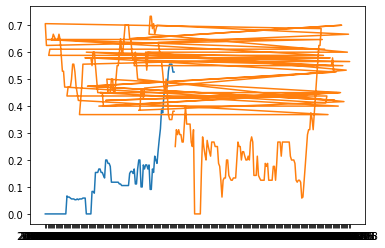

In [ ]:
## Verstappen vs Hamilton win rate 
plt.plot(x["date"],x["win_rate"])
plt.plot(y["date"],y["win_rate"])
plt.show()

In [ ]:
## RMSE of test data using logreg 1 and 2
df = df_driver
Train1 = df[(df["date"]<=train_till_date)&(df["year"]>=2020)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test1= df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg1 = smf.logit(formula="""winner ~ Past_n_year_wins+Past_n_year_podium_driver +Past_n_year_pole"""
                                    , data=Train1).fit()

predictions = log_reg1.predict(Test1)
Test1["Win_prob_log"] = predictions
Test1["Error"] = np.sqrt((Test1["winner"] - Test1["Win_prob_log"])**2)
rmse1 = np.mean(Test1["Error"])
rmse1

Optimization terminated successfully.
         Current function value: 0.125106
         Iterations 9


0.09634017326722963

In [ ]:
df = df_driver
Train2 = df[(df["date"]<=train_till_date)&(df["year"]>=2020)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test2 = df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg2 = smf.logit(formula="""winner ~ win_rate+	podium_rate+	points_rate+	pole_rate"""
                                    , data=Train2).fit()

predictions = log_reg2.predict(Test2)
Test2["Win_prob_log"] = predictions
Test2["Error"] = np.sqrt((Test2["winner"] - Test2["Win_prob_log"])**2)
rmse2 = np.mean(Test2["Error"])
rmse2

Optimization terminated successfully.
         Current function value: 0.114879
         Iterations 11


0.07848718671721361

In [ ]:
## lower rmse test data for rates compared to absolute
# checking statistical significance
# caomparing variances
ratio = np.var(Test1["Error"])/np.var(Test2["Error"])
ratio
# since rati is less than 4:1 we can assume equal variance for t-test

1.4714444721451452

In [ ]:
## not statistically different Errors
stats.ttest_ind(a=Test1["Error"], b=Test2["Error"], equal_var=True)

Ttest_indResult(statistic=1.0254741138043464, pvalue=0.30553311055574733)

In [ ]:
## Other Features to explore
# Dominant Track weightage (eg. lewis hamilton in certain tracks)
# Home Advantage (Ferrari in Italy)
# Weather Advantage 

In [ ]:
## Doing the same as above with larger train and test samples
df = df_driver
Train3 = df[(df["date"]<=train_till_date)&(df["year"]>=2015)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test3 = df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg3 = smf.logit(formula="""winner ~ Past_n_year_wins+Past_n_year_podium_driver +Past_n_year_pole"""
                                    , data=Train3).fit()

predictions = log_reg1.predict(Test3)
Test3["Win_prob_log"] = predictions
Test3["Error"] = np.sqrt((Test3["winner"] - Test3["Win_prob_log"])**2)
rmse = np.mean(Test3["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.136494
         Iterations 9


0.09634017326722963

In [ ]:
df = df_driver
Train4 = df[(df["date"]<=train_till_date)&(df["year"]>=2015)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test4 = df[(df["date"]>train_till_date)&(df["year"]>=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg4 = smf.logit(formula="""winner ~ win_rate+	podium_rate+	points_rate+	pole_rate"""
                                    , data=Train4).fit()

predictions = log_reg2.predict(Test4)
Test4["Win_prob_log"] = predictions
Test4["Error"] = np.sqrt((Test4["winner"] - Test4["Win_prob_log"])**2)
rmse = np.mean(Test4["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.128372
         Iterations 10


0.07848718671721361

In [ ]:
## Check the fit results
log_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 winner   No. Observations:                 2088
Model:                          Logit   Df Residuals:                     2084
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3941
Time:                        00:46:20   Log-Likelihood:                -285.00
converged:                       True   LL-Null:                       -470.38
Covariance Type:            nonrobust   LLR p-value:                 4.771e-80
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.9704      0.272    -18.280      0.000      -5.503      -4.437
Past_n_year_wins              0.0060      0.066      0.090      0.928      -0.124       0.136
Past_n_year_podium_driver     0.2817      0.036      7.892      0.000       0.212       0.352
Past_n_year_pole              0.0608      0.063      0.958      0.338      -0.064       0.185
=============================================================================================
"""

In [ ]:
log_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 winner   No. Observations:                 2088
Model:                          Logit   Df Residuals:                     2083
Method:                           MLE   Df Model:                            4
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4302
Time:                        00:46:20   Log-Likelihood:                -268.04
converged:                       True   LL-Null:                       -470.38
Covariance Type:            nonrobust   LLR p-value:                 2.717e-86
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.2905      0.757     -9.625      0.000      -8.775      -5.806
win_rate       -1.9993      1.411     -1.417      0.157      -4.765       0.767
podium_rate    -1.3832      1.431     -0.966      0.334      -4.188       1.422
points_rate     0.4354      0.105      4.139      0.000       0.229       0.642
pole_rate       1.3182      1.069      1.233      0.218      -0.777       3.414
===============================================================================
"""

In [ ]:
## Check RMSE significance
ratio = np.var(Test3["Error"])/np.var(Test4["Error"])
ratio

1.4714444721451452

In [ ]:
stats.ttest_ind(a=Test3["Error"], b=Test4["Error"], equal_var=True)

Ttest_indResult(statistic=1.0254741138043464, pvalue=0.30553311055574733)

In [ ]:
## lets only work with win rate
# only taking till 2021
df = df_driver
Train5 = df[(df["date"]<=train_till_date)&(df["year"]>=2015)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test5 = df[(df["date"]>train_till_date)&(df["year"]<=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg5 = smf.logit(formula="""winner ~ win_rate"""
                                    , data=Train5).fit()

predictions = log_reg2.predict(Test5)
Test5["Win_prob_log"] = predictions
Test5["Error"] = np.sqrt((Test5["winner"] - Test5["Win_prob_log"])**2)
rmse = np.mean(Test5["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.149656
         Iterations 8


0.07682420646197663

In [ ]:
print(log_reg5.summary())
## highly statistically significant
## implies multicollinearity

                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 2088
Model:                          Logit   Df Residuals:                     2086
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3357
Time:                        00:46:20   Log-Likelihood:                -312.48
converged:                       True   LL-Null:                       -470.38
Covariance Type:            nonrobust   LLR p-value:                 1.194e-70
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9402      0.159    -24.754      0.000      -4.252      -3.628
win_rate       7.5410      0.453     16.646      0.000       6.653       8.429


In [ ]:
# Now check past number of wins as a festure and compare rmse

df = df_driver
Train6 = df[(df["date"]<=train_till_date)&(df["year"]>=2015)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test6 = df[(df["date"]>train_till_date)&(df["year"]<=2021)][["date","year","raceId","driverId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg6 = smf.logit(formula="""winner ~ Past_n_year_wins"""
                                    , data=Train6).fit()

predictions = log_reg1.predict(Test6)
Test6["Win_prob_log"] = predictions
Test6["Error"] = np.sqrt((Test6["winner"] - Test6["Win_prob_log"])**2)
rmse = np.mean(Test6["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.153304
         Iterations 8


0.09209097555635258

In [ ]:
print(log_reg6.summary())
# Also significant

                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 2088
Model:                          Logit   Df Residuals:                     2086
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.3195
Time:                        00:46:21   Log-Likelihood:                -320.10
converged:                       True   LL-Null:                       -470.38
Covariance Type:            nonrobust   LLR p-value:                 2.485e-67
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.8475      0.153    -25.183      0.000      -4.147      -3.548
Past_n_year_wins     0.3978      0.024     16.435      0.000       0.350       0.445


In [ ]:
# check statistical significance
ratio = np.var(Test6["Error"])/np.var(Test5["Error"])
ratio
## assume equal variance

1.4268738886643235

In [ ]:
stats.ttest_ind(a=Test5["Error"], b=Test6["Error"], equal_var=True)
# still insignificant, using win rate is not necessarily better than absolute past wins

Ttest_indResult(statistic=-0.8742660557453688, pvalue=0.38232790302030806)

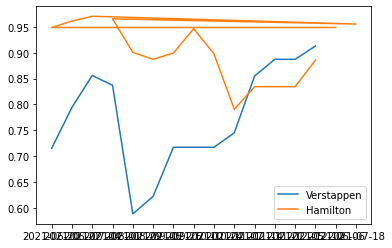

In [ ]:
vers = Test6[Test6["driverId"]==830][["date","Win_prob_log"]]
hamil = Test6[Test6["driverId"]==1][["date","Win_prob_log"]]

plt.plot(vers["date"],vers["Win_prob_log"])
plt.plot(hamil["date"],hamil["Win_prob_log"])
plt.legend(["Verstappen","Hamilton"])
plt.show()

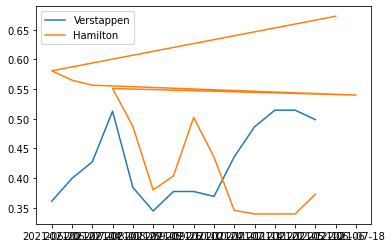

In [ ]:
vers = Test5[Test5["driverId"]==830][["date","Win_prob_log"]]
hamil = Test5[Test5["driverId"]==1][["date","Win_prob_log"]]

plt.plot(vers["date"],vers["Win_prob_log"])
plt.plot(hamil["date"],hamil["Win_prob_log"])
plt.legend(["Verstappen","Hamilton"])
plt.show()

In [ ]:
## correlation analysis
Train5[["Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]].corr()

,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,points,win_rate,podium_rate,points_rate,pole_rate,winner
Past_n_year_podium_driver,1.000000,0.845604,0.817489,0.749963,0.847912,0.985815,0.944407,0.815696,0.496339
Past_n_year_wins,0.845604,1.000000,0.936935,0.616576,0.992022,0.811022,0.784615,0.923964,0.533398
Past_n_year_pole,0.817489,0.936935,1.000000,0.597625,0.926986,0.782466,0.750097,0.992328,0.522727
points,0.749963,0.616576,0.597625,1.000000,0.630430,0.754921,0.788201,0.604642,0.641595
win_rate,0.847912,0.992022,0.926986,0.630430,1.000000,0.830729,0.802294,0.927662,0.540928
podium_rate,0.985815,0.811022,0.782466,0.754921,0.830729,1.000000,0.953083,0.796467,0.490391
points_rate,0.944407,0.784615,0.750097,0.788201,0.802294,0.953083,1.000000,0.760986,0.471896
pole_rate,0.815696,0.923964,0.992328,0.604642,0.927662,0.796467,0.760986,1.000000,0.524595
winner,0.496339,0.533398,0.522727,0.641595,0.540928,0.490391,0.471896,0.524595,1.000000


In [ ]:
## lets use win rate and points rate
df = df_driver
Train7 = df[(df["date"]<=train_till_date)&(df["year"]>=2015)][["date","year","raceId","driverId","constructorId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
Test7 = df[(df["date"]>train_till_date)&(df["year"]<=2021)][["date","year","raceId","driverId","constructorId","Past_n_year_podium_driver","Past_n_year_wins","Past_n_year_pole","points","win_rate",	"podium_rate",	"points_rate",	"pole_rate","winner"]]
log_reg7 = smf.logit(formula="""winner ~ win_rate + points_rate"""
                                    , data=Train7).fit()

predictions = log_reg2.predict(Test7)
Test7["Win_prob_log"] = predictions
Test7["Error"] = np.sqrt((Test7["winner"] - Test7["Win_prob_log"])**2)
rmse = np.mean(Test7["Error"])
rmse

Optimization terminated successfully.
         Current function value: 0.128903
         Iterations 10


0.07682420646197663

In [ ]:
print(log_reg7.summary())
## colinearity

                           Logit Regression Results                           
Dep. Variable:                 winner   No. Observations:                 2088
Model:                          Logit   Df Residuals:                     2085
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                  0.4278
Time:                        00:46:21   Log-Likelihood:                -269.15
converged:                       True   LL-Null:                       -470.38
Covariance Type:            nonrobust   LLR p-value:                 4.046e-88
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.9148      0.579    -11.952      0.000      -8.049      -5.781
win_rate       -0.5338      0.973     -0.548      0.583      -2.442       1.374
points_rate     0.3527      0.049      7.254    

In [ ]:
Test5

,date,year,raceId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,points,win_rate,podium_rate,points_rate,pole_rate,winner,Win_prob_log,Error
14283,2021-06-06,2021,1057,815,2,1,0,25.0,0.052632,0.105263,8.894737,0.0,1,0.045908,0.954092
14284,2021-06-06,2021,1057,20,1,0,0,18.0,0.000000,0.050000,2.150000,0.0,0,0.001042,0.001042
14285,2021-06-06,2021,1057,842,1,1,0,15.0,0.052632,0.052632,4.789474,0.0,0,0.005072,0.005072
14286,2021-06-06,2021,1057,844,2,0,0,12.0,0.000000,0.117647,8.117647,0.0,0,0.027457,0.027457
14287,2021-06-06,2021,1057,846,3,0,0,10.0,0.000000,0.142857,7.285714,0.0,0,0.015302,0.015302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,2021-12-12,2021,1073,20,1,0,0,0.0,0.000000,0.052632,2.263158,0.0,0,0.001103,0.001103
14576,2021-12-12,2021,1073,817,1,1,0,0.0,0.047619,0.047619,5.761905,0.0,0,0.009195,0.009195
14577,2021-12-12,2021,1073,840,0,0,0,0.0,0.000000,0.000000,1.842105,0.0,0,0.001057,0.001057
14578,2021-12-12,2021,1073,854,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0,0.000352,0.000352


In [ ]:
## Function for position predictor based on likelihood
df = Test5.copy()
df1 = df[df["raceId"]==1057]
points_list = list(df1["points"].sort_values(ascending=False))
position_list = np.arange(1,len(df1)+1,1)
df2 = df1.sort_values(by="Win_prob_log",ascending=False)
df2["points_predicted"] = np.array(points_list)
df2["position_predicted"] = np.array(position_list)
df2

,date,year,raceId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,points,win_rate,podium_rate,points_rate,pole_rate,winner,Win_prob_log,Error,points_predicted,position_predicted
14297,2021-06-06,2021,1057,1,18,14,12,0.0,0.666667,0.857143,21.333333,0.571429,0,0.672603,0.672603,25.0,1
14294,2021-06-06,2021,1057,822,14,2,5,0.0,0.105263,0.736842,14.210526,0.263158,0,0.059058,0.059058,18.0,2
14283,2021-06-06,2021,1057,815,2,1,0,25.0,0.052632,0.105263,8.894737,0.000000,1,0.045908,0.954092,15.0,3
14286,2021-06-06,2021,1057,844,2,0,0,12.0,0.000000,0.117647,8.117647,0.000000,0,0.027457,0.027457,12.0,4
14290,2021-06-06,2021,1057,832,2,0,0,4.0,0.000000,0.105263,7.526316,0.000000,0,0.020400,0.020400,10.0,5
14287,2021-06-06,2021,1057,846,3,0,0,10.0,0.000000,0.142857,7.285714,0.000000,0,0.015302,0.015302,8.0,6
14291,2021-06-06,2021,1057,817,2,0,0,2.0,0.000000,0.095238,6.809524,0.000000,0,0.013922,0.013922,6.0,7
14285,2021-06-06,2021,1057,842,1,1,0,15.0,0.052632,0.052632,4.789474,0.000000,0,0.005072,0.005072,4.0,8
14284,2021-06-06,2021,1057,20,1,0,0,18.0,0.000000,0.050000,2.150000,0.000000,0,0.001042,0.001042,2.0,9
14288,2021-06-06,2021,1057,4,0,0,0,8.0,0.000000,0.000000,1.250000,0.000000,0,0.000742,0.000742,1.0,10


Position and Points Predicting Function

In [ ]:
def predict_positions(df,model_pred_column,type):
  final_df = pd.DataFrame()
  if type == "win_likelihood":
    for i in df["raceId"].unique():
      df1 = df[df["raceId"]==i].copy()
      points_list = [25,18,15,12,10,8,6,4,2,1] + [0]*(len(df1)-10)
      position_list = np.arange(1,len(df1)+1,1)
      df2 = df1.sort_values(by=model_pred_column,ascending=False)
      df2["points_predicted"] = np.array(points_list)
      df2["position_predicted"] = np.array(position_list)
      
      final_df = pd.concat([final_df,df2])

    return final_df
  if type == "position":
    for i in df["raceId"].unique():
      df1 = df[df["raceId"]==i].copy()
      points_list = [25,18,15,12,10,8,6,4,2,1] + [0]*(len(df1)-10)
      position_list = np.arange(1,len(df1)+1,1)
      df2 = df1.sort_values(by=model_pred_column,ascending=True)
      df2["points_predicted"] = np.array(points_list)
      df2["position_predicted"] = np.array(position_list)
      
      final_df = pd.concat([final_df,df2])

    return final_df

In [ ]:
## Function results
result = predict_positions(Test5.copy()[["date","year","raceId","driverId","points","Win_prob_log"]],"Win_prob_log",type="win_likelihood")
result

,date,year,raceId,driverId,points,Win_prob_log,points_predicted,position_predicted
14297,2021-06-06,2021,1057,1,0.0,0.672603,25,1
14294,2021-06-06,2021,1057,822,0.0,0.059058,18,2
14283,2021-06-06,2021,1057,815,25.0,0.045908,15,3
14286,2021-06-06,2021,1057,844,12.0,0.027457,12,4
14290,2021-06-06,2021,1057,832,4.0,0.020400,10,5
...,...,...,...,...,...,...,...,...
14573,2021-12-12,2021,1073,839,2.0,0.002978,0,11
14575,2021-12-12,2021,1073,20,0.0,0.001103,0,12
14577,2021-12-12,2021,1073,840,0.0,0.001057,0,13
14568,2021-12-12,2021,1073,852,12.0,0.000710,0,14


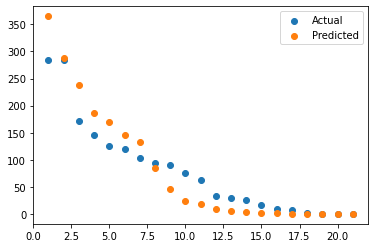

In [ ]:
# check predicted winner of the season
points_season_pred = result.groupby("driverId").sum()[["points_predicted"]].sort_values(by="points_predicted",ascending = False)
points_season = result.groupby("driverId").sum()[["points"]].sort_values(by="points",ascending = False)
position_season = np.arange(1,len(points_season)+1,1)

plt.scatter(position_season,points_season)
plt.scatter(position_season,points_season_pred)
plt.legend(["Actual","Predicted"])
plt.show()

In [ ]:
### elo rating system
# intial rating is win_rate for first race
# adjust ratings after each race for all competitors
# once we have all elo ratings, use initial elo ratings and initial win_rates for each driver and carry out simulations

In [ ]:
result[result["raceId"]==1073].sort_values(by="points",ascending=False)

,date,year,raceId,driverId,points,Win_prob_log,points_predicted,position_predicted
14565,2021-12-12,2021,1073,830,26.0,0.498484,25,1
14566,2021-12-12,2021,1073,1,18.0,0.372965,18,2
14567,2021-12-12,2021,1073,832,15.0,0.014183,6,7
14568,2021-12-12,2021,1073,852,12.0,0.000710,0,14
14569,2021-12-12,2021,1073,842,10.0,0.007467,2,9
14570,2021-12-12,2021,1073,822,8.0,0.034499,12,4
14571,2021-12-12,2021,1073,846,6.0,0.016024,8,6
14572,2021-12-12,2021,1073,4,4.0,0.003208,1,10
14573,2021-12-12,2021,1073,839,2.0,0.002978,0,11
14574,2021-12-12,2021,1073,844,1.0,0.029007,10,5


Position Prediction Models

In [ ]:
## Try to predict position by win rate and othe rfeatures

In [ ]:
df_driver_pos = df_driver[["date","year","raceId","constructorId","driverId","Past_n_year_races","points","position","win_rate","Past_n_year_avg_pos"]].copy()
df_driver_pos

,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos
0,2008-03-16,2008,18,5,1,16,10.0,1,0.250000,3.000000
1,2008-03-16,2008,18,8,2,15,8.0,2,0.000000,5.333333
2,2008-03-16,2008,18,9,3,14,6.0,3,0.000000,9.142857
3,2008-03-16,2008,18,4,4,16,5.0,4,0.250000,2.937500
4,2008-03-16,2008,18,5,5,16,4.0,5,0.000000,7.875000
...,...,...,...,...,...,...,...,...,...,...
14594,2022-03-20,2022,1074,5,846,21,0.0,15,0.000000,6.619048
14595,2022-03-20,2022,1074,9,849,19,0.0,16,0.000000,15.105263
14596,2022-03-20,2022,1074,7,807,0,0.0,17,0.000000,10.000000
14597,2022-03-20,2022,1074,3,815,20,0.0,18,0.050000,6.600000


In [ ]:
Train8 = df_driver_pos.copy()
linear_reg1 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos"""
                                    , data=Train8).fit()

predictions = linear_reg1.predict(Train8)
Train8["Pred_position"] = predictions
Train8["Error"] = np.sqrt((Train8["position"] - Train8["Pred_position"])**2)
rmse = np.mean(Train8["Error"])
rmse


2.792402461353922

In [ ]:
print(linear_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     5818.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:22   Log-Likelihood:                -39332.
No. Observations:               14599   AIC:                         7.867e+04
Df Residuals:                   14596   BIC:                         7.869e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3686    

In [ ]:
## compare this with solely win_rate
Train9 = df_driver_pos.copy()
linear_reg2 = smf.ols(formula="""position ~ win_rate"""
                                    , data=Train9).fit()

predictions = linear_reg2.predict(Train9)
Train9["Pred_position"] = predictions
Train9["Error"] = np.sqrt((Train9["position"] - Train9["Pred_position"])**2)
rmse = np.mean(Train9["Error"])
rmse

3.5722218684670746

In [ ]:

# check statistical significance
ratio = np.var(Train9["Error"])/np.var(Train8["Error"])
ratio
## assume equal variance < 4:1

1.2795665877373064

In [ ]:
stats.ttest_ind(a=Train9["Error"], b=Train8["Error"], equal_var=True)
# statistically significant result, include past average position

Ttest_indResult(statistic=27.867361122856014, pvalue=1.0750334809465553e-168)

In [ ]:
df_driver.corr()

,year,raceId,constructorId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_points,points,Past_n_year_avg_pos,driver_home_adv,constructor_home_adv,position,winner,win_rate,podium_rate,points_rate,pole_rate
year,1.000000,0.065726,-0.543588,0.021716,0.158198,0.101122,0.122406,0.686079,0.402876,0.245450,0.234388,-0.241879,-0.209435,0.195348,-0.039880,-0.048976,-0.085141,0.309538,-0.006018
raceId,0.065726,1.000000,0.193989,0.695867,-0.009969,-0.006447,0.014359,0.179020,0.299973,0.222206,0.139941,0.051735,0.053121,0.096475,-0.014488,-0.027407,-0.048052,0.271288,-0.011855
constructorId,-0.543588,0.193989,1.000000,0.184180,-0.198690,-0.132314,-0.132763,-0.415511,-0.239193,-0.177011,0.081612,0.178649,0.186064,0.071610,-0.030781,-0.058063,-0.092180,-0.217926,-0.081234
driverId,0.021716,0.695867,0.184180,1.000000,-0.222836,-0.196477,-0.174377,0.014997,-0.055798,-0.039027,0.279668,0.078411,0.077981,0.196636,-0.085677,-0.154803,-0.188849,-0.071813,-0.136879
Past_n_year_podium_driver,0.158198,-0.009969,-0.198690,-0.222836,1.000000,0.838757,0.752613,0.463221,0.792051,0.620865,-0.687414,-0.064314,-0.047144,-0.487544,0.375514,0.723166,0.862052,0.835547,0.637306
Past_n_year_wins,0.101122,-0.006447,-0.132314,-0.196477,0.838757,1.000000,0.871467,0.337246,0.674709,0.521134,-0.537865,-0.031328,-0.030321,-0.386518,0.402853,0.893110,0.703887,0.708635,0.757745
Past_n_year_pole,0.122406,0.014359,-0.132763,-0.174377,0.752613,0.871467,1.000000,0.317102,0.646329,0.507783,-0.462053,-0.033538,-0.031093,-0.341080,0.385721,0.746262,0.607889,0.661202,0.892078
Past_n_year_races,0.686079,0.179020,-0.415511,0.014997,0.463221,0.337246,0.317102,1.000000,0.613603,0.428056,-0.157366,-0.191318,-0.148719,-0.122194,0.105993,0.205147,0.241082,0.543634,0.197018
Past_n_year_points,0.402876,0.299973,-0.239193,-0.055798,0.792051,0.674709,0.646329,0.613603,1.000000,0.732161,-0.480459,-0.077341,-0.061592,-0.342903,0.248970,0.481321,0.532526,0.953181,0.461538
points,0.245450,0.222206,-0.177011,-0.039027,0.620865,0.521134,0.507783,0.428056,0.732161,1.000000,-0.455377,-0.054867,-0.035510,-0.646486,0.544797,0.424094,0.490190,0.748581,0.414674


In [ ]:
# Try to add another feature
Train10 = df_driver_pos.copy()
linear_reg3 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos + Past_n_year_races"""
                                    , data=Train10).fit()

predictions = linear_reg3.predict(Train8)
Train10["Pred_position"] = predictions
Train10["Error"] = np.sqrt((Train10["position"] - Train10["Pred_position"])**2)
rmse = np.mean(Train10["Error"])
rmse

2.790583679499136

In [ ]:
linear_reg3.summary()
## doesn't help much

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               position   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     3882.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:22   Log-Likelihood:                -39329.
No. Observations:               14599   AIC:                         7.867e+04
Df Residuals:                   14595   BIC:                         7.870e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4796      0.106     13.994      0.000       1.272       1.687
win_rate               -1.0372      0.241     -4.303      0.000      -1.510      -0.565
Past_n_year_avg_pos     0.8352      0.010     84.960      0.000       0.816       0.854
Past_n_year_races      -0.0120      0.005     -2.229      0.026      -0.023      -0.001
==============================================================================
Omnibus:                     1032.337   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1553.686
Skew:                           0.580   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# check 
# Train8 baased on predicted position
result2 = predict_positions(Train8[(Train8["date"]<=train_till_date)&(Train8["year"]>=2015)],"Pred_position",type="position")
result2

,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos,Pred_position,Error,points_predicted,position_predicted
12194,2015-03-15,2015,926,1,1,16,25.0,1,0.687500,1.437500,1.805335,0.805335,25,1
12195,2015-03-15,2015,926,1,3,17,18.0,2,0.294118,2.529412,3.156376,1.156376,18,2
12199,2015-03-15,2015,926,3,817,16,8.0,6,0.187500,3.750000,4.295776,1.704224,15,3
12196,2015-03-15,2015,926,2,20,16,15.0,3,0.000000,5.062500,5.602080,2.602080,12,4
12197,2015-03-15,2015,926,9,13,16,12.0,4,0.000000,7.375000,7.535888,3.535888,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14274,2021-05-23,2021,1056,8,841,18,1.0,10,0.000000,13.722222,12.843696,2.843696,0,14
14278,2021-05-23,2021,1056,9,847,16,0.0,14,0.000000,14.625000,13.598636,0.401364,0,15
14279,2021-05-23,2021,1056,9,849,17,0.0,15,0.000000,15.764706,14.551705,0.448295,0,16
14282,2021-05-23,2021,1056,10,854,4,0.0,18,0.000000,16.750000,15.375649,2.624351,0,17


In [ ]:
df_result = pd.DataFrame(result2.groupby(["year","driverId"]).sum()[["points_predicted","position_predicted"]])
df_result


points_predicted  position_predicted
year driverId                                      
2015 1                      450                  18
     3                      328                  36
     4                       44                  98
     8                       90                  98
     13                     141                  90
...                         ...                 ...
2021 847                      0                  64
     849                      0                  68
     852                      0                  49
     853                      0                  69
     854                      0                  82

[151 rows x 2 columns]

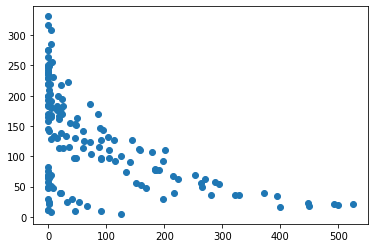

In [ ]:
plt.scatter(df_result["points_predicted"],df_result["position_predicted"])
plt.show()

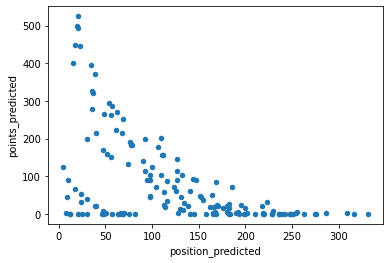

In [ ]:
# plot based on year
df_result.plot(x="position_predicted",y="points_predicted",kind="scatter")

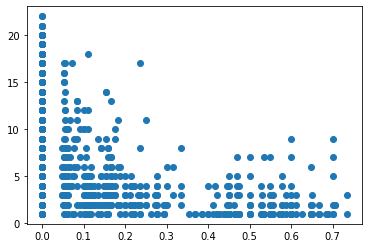

In [ ]:
plt.scatter(result2["win_rate"],result2["position"])
plt.show()

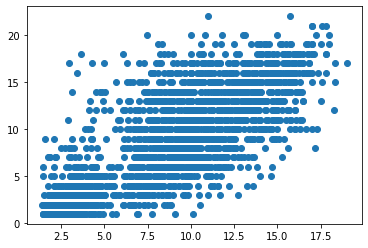

In [ ]:
plt.scatter(result2["Past_n_year_avg_pos"],result2["position"])
plt.show()

Including Ruolin's Features

Running the model with new features

In [ ]:
df_driver

,date,year,raceId,constructorId,driverId,Past_n_year_podium_driver,Past_n_year_wins,Past_n_year_pole,Past_n_year_races,Past_n_year_points,points,Past_n_year_avg_pos,driver_home_adv,constructor_home_adv,position,winner,win_rate,podium_rate,points_rate,pole_rate
0,2008-03-16,2008,18,5,1,12,4,5,16,109.0,10.0,3.000000,0,0,1,1,0.250000,0.750000,6.812500,0.312500
1,2008-03-16,2008,18,8,2,2,0,0,15,61.0,8.0,5.333333,0,0,2,0,0.000000,0.133333,4.066667,0.000000
2,2008-03-16,2008,18,9,3,0,0,0,14,20.0,6.0,9.142857,0,0,3,0,0.000000,0.000000,1.428571,0.000000
3,2008-03-16,2008,18,4,4,12,4,2,16,109.0,5.0,2.937500,0,0,4,0,0.250000,0.750000,6.812500,0.125000
4,2008-03-16,2008,18,5,5,1,0,0,16,30.0,4.0,7.875000,0,0,5,0,0.000000,0.062500,1.875000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,2022-03-20,2022,1074,5,846,4,0,1,21,160.0,0.0,6.619048,0,0,15,0,0.000000,0.190476,7.619048,0.047619
14595,2022-03-20,2022,1074,9,849,0,0,0,19,7.0,0.0,15.105263,0,0,16,0,0.000000,0.000000,0.368421,0.000000
14596,2022-03-20,2022,1074,7,807,0,0,0,0,0.0,0.0,10.000000,0,0,17,0,0.000000,0.000000,0.000000,0.000000
14597,2022-03-20,2022,1074,3,815,5,1,0,20,190.0,0.0,6.600000,0,0,18,0,0.050000,0.250000,9.500000,0.000000


In [ ]:
df_driver_final = df_driver[["date","year","raceId","constructorId","driverId","Past_n_year_races","points","position","win_rate","Past_n_year_avg_pos","constructor_home_adv","driver_home_adv"]]
Train11 = df_driver_final.copy()
linear_reg4 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos + constructor_home_adv + driver_home_adv"""
                                    , data=Train11).fit()

predictions = linear_reg4.predict(Train11)
Train11["Pred_position"] = predictions
Train11["Error"] = np.sqrt((Train11["position"] - Train11["Pred_position"])**2)
rmse = np.mean(Train11["Error"])
rmse

2.792006832994917

In [ ]:
print(linear_reg4.summary())

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     2911.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:23   Log-Likelihood:                -39330.
No. Observations:               14599   AIC:                         7.867e+04
Df Residuals:                   14594   BIC:                         7.871e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3485 

In [ ]:
## RMSE is the same as for win rate and past position, doesn't improve
# check collinearity between features again

In [ ]:
Train11.corr()

,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos,constructor_home_adv,driver_home_adv,Pred_position,Error
year,1.000000,0.065726,-0.543588,0.021716,0.686079,0.245450,0.195348,-0.048976,0.234388,-0.209435,-0.241879,0.225148,-0.041021
raceId,0.065726,1.000000,0.193989,0.695867,0.179020,0.222206,0.096475,-0.027407,0.139941,0.053121,0.051735,0.138002,0.012963
constructorId,-0.543588,0.193989,1.000000,0.184180,-0.415511,-0.177011,0.071610,-0.058063,0.081612,0.186064,0.178649,0.085824,0.037849
driverId,0.021716,0.695867,0.184180,1.000000,0.014997,-0.039027,0.196636,-0.154803,0.279668,0.077981,0.078411,0.280500,0.034187
Past_n_year_races,0.686079,0.179020,-0.415511,0.014997,1.000000,0.428056,-0.122194,0.205147,-0.157366,-0.148719,-0.191318,-0.166318,-0.071537
points,0.245450,0.222206,-0.177011,-0.039027,0.428056,1.000000,-0.646486,0.424094,-0.455377,-0.035510,-0.054867,-0.464000,-0.012109
position,0.195348,0.096475,0.071610,0.196636,-0.122194,-0.646486,1.000000,-0.408853,0.665403,0.017818,0.026162,0.666139,0.250785
win_rate,-0.048976,-0.027407,-0.058063,-0.154803,0.205147,0.424094,-0.408853,1.000000,-0.579159,-0.016971,-0.024190,-0.613765,-0.113217
Past_n_year_avg_pos,0.234388,0.139941,0.081612,0.279668,-0.157366,-0.455377,0.665403,-0.579159,1.000000,0.007881,0.029476,0.998894,0.102148
constructor_home_adv,-0.209435,0.053121,0.186064,0.077981,-0.148719,-0.035510,0.017818,-0.016971,0.007881,1.000000,0.364352,0.026747,0.064684


In [ ]:
# remove driver home and try
Train12 = df_driver_final.copy()
linear_reg5 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos + constructor_home_adv"""
                                    , data=Train12).fit()

predictions = linear_reg5.predict(Train11)
Train12["Pred_position"] = predictions
Train12["Error"] = np.sqrt((Train12["position"] - Train12["Pred_position"])**2)
rmse = np.mean(Train12["Error"])
rmse

2.7920068844417023

In [ ]:
print(linear_reg5.summary())

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     3881.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:23   Log-Likelihood:                -39330.
No. Observations:               14599   AIC:                         7.867e+04
Df Residuals:                   14595   BIC:                         7.870e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3499 

In [ ]:
## Doesn't improve R square but is significant

In [ ]:
# Try only driver home
# remove driver home and try
Train13 = df_driver_final.copy()
linear_reg6 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos + driver_home_adv"""
                                    , data=Train13).fit()

predictions = linear_reg6.predict(Train11)
Train13["Pred_position"] = predictions
Train13["Error"] = np.sqrt((Train13["position"] - Train13["Pred_position"])**2)
rmse = np.mean(Train13["Error"])
rmse

2.7923459172231953

In [ ]:
print(linear_reg6.summary())

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     3879.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:46:23   Log-Likelihood:                -39331.
No. Observations:               14599   AIC:                         7.867e+04
Df Residuals:                   14595   BIC:                         7.870e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3609    

In [ ]:
# driver home adv is not significant alone

# Final Model Dataset
final_df = df_driver_final.copy()[["date","year","raceId","constructorId","driverId","Past_n_year_races","points","position","win_rate","Past_n_year_avg_pos","constructor_home_adv"]]
final_df

,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos,constructor_home_adv
0,2008-03-16,2008,18,5,1,16,10.0,1,0.250000,3.000000,0
1,2008-03-16,2008,18,8,2,15,8.0,2,0.000000,5.333333,0
2,2008-03-16,2008,18,9,3,14,6.0,3,0.000000,9.142857,0
3,2008-03-16,2008,18,4,4,16,5.0,4,0.250000,2.937500,0
4,2008-03-16,2008,18,5,5,16,4.0,5,0.000000,7.875000,0
...,...,...,...,...,...,...,...,...,...,...,...
14594,2022-03-20,2022,1074,5,846,21,0.0,15,0.000000,6.619048,0
14595,2022-03-20,2022,1074,9,849,19,0.0,16,0.000000,15.105263,0
14596,2022-03-20,2022,1074,7,807,0,0.0,17,0.000000,10.000000,0
14597,2022-03-20,2022,1074,3,815,20,0.0,18,0.050000,6.600000,0


In [ ]:
# z-score dataframe
z_df = final_df.copy()[["date","year","raceId","constructorId","driverId","Past_n_year_races","points","position","constructor_home_adv"]]
z_df["win_rate_z"] = (final_df["win_rate"] - np.mean(final_df["win_rate"]))/np.std(final_df["win_rate"])
z_df["past_avg_position_z"] = (final_df["Past_n_year_avg_pos"] - np.mean(final_df["Past_n_year_avg_pos"]))/np.std(final_df["Past_n_year_avg_pos"])
z_df

,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,constructor_home_adv,win_rate_z,past_avg_position_z
0,2008-03-16,2008,18,5,1,16,10.0,1,0,1.187704,-1.332138
1,2008-03-16,2008,18,8,2,15,8.0,2,0,-0.453961,-0.701652
2,2008-03-16,2008,18,9,3,14,6.0,3,0,-0.453961,0.327712
3,2008-03-16,2008,18,4,4,16,5.0,4,0,1.187704,-1.349026
4,2008-03-16,2008,18,5,5,16,4.0,5,0,-0.453961,-0.014873
...,...,...,...,...,...,...,...,...,...,...,...
14594,2022-03-20,2022,1074,5,846,21,0.0,15,0,-0.453961,-0.354242
14595,2022-03-20,2022,1074,9,849,19,0.0,16,0,-0.453961,1.938803
14596,2022-03-20,2022,1074,7,807,0,0.0,17,0,-0.453961,0.559319
14597,2022-03-20,2022,1074,3,815,20,0.0,18,0,-0.125628,-0.359389


Final Models

In [ ]:
## Linear Regression
# Normal
train_till_date = df_driver[df_driver["year"]==2021]["date"].unique()[4]
# Train till first 5 races of 2021
Train14 = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)]
Test14 = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)]
lin_reg1 = smf.ols(formula="""position ~ win_rate + Past_n_year_avg_pos + constructor_home_adv""", data=Train14).fit()

predictions = lin_reg1.predict(Test14)
Test14["Pred_position"] = predictions
Test14["Error"] = np.sqrt((Test14["position"] - Test14["Pred_position"])**2)
rmse = np.mean(Test14["Error"])
rmse

<ipython-input-142-9b67959fb2ee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test14["Pred_position"] = predictions
<ipython-input-142-9b67959fb2ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test14["Error"] = np.sqrt((Test14["position"] - Test14["Pred_position"])**2)


2.7035053430215337

In [ ]:
# 2.83 out of sample rmse for linear regression

In [ ]:
## z score linear regression
Train15 = z_df[(z_df["date"]<=train_till_date)&(z_df["year"]>=2000)]
Test15 = z_df[(z_df["date"]>train_till_date)&(z_df["year"]<=2021)]
lin_reg2 = smf.ols(formula="""position ~ win_rate_z + past_avg_position_z + constructor_home_adv""", data=Train15).fit()

predictions = lin_reg2.predict(Test15)
Test15["Pred_position"] = predictions
Test15["Error"] = np.sqrt((Test15["position"] - Test15["Pred_position"])**2)
rmse = np.mean(Test14["Error"])
rmse
## Exactly same rmse value obtained for z-score dataframe

<ipython-input-144-0fc2da06d932>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test15["Pred_position"] = predictions
<ipython-input-144-0fc2da06d932>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test15["Error"] = np.sqrt((Test15["position"] - Test15["Pred_position"])**2)


2.7035053430215337

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x_train = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)][["win_rate","Past_n_year_avg_pos"]]
y_train = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)]["position"]
x_test = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)][["win_rate","Past_n_year_avg_pos"]]
y_test = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)]["position"]

from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50, 100), 
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestRegressor(),parameters,cv=3) # looks at all the combinations of values and try them, also tell the required class
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

(0.5204925575686036,
 {'max_depth': 4,
  'min_samples_leaf': 12,
  'min_samples_split': 2,
  'n_estimators': 10})

In [ ]:
## Random Forest Regresssor
from sklearn import metrics as sk_m
model1 = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=12)
model1.fit(x_train,np.ravel(y_train))
predict_forest = model1.predict(x_test)
rmse = sk_m.mean_squared_error(y_test,predict_forest,squared=False)
rmse
## rmse for random forest regressor is 3.542 which is higher than that of linear regression

3.542688556396081

In [ ]:
x_train1 = z_df[(z_df["date"]<=train_till_date)&(z_df["year"]>=2000)][["win_rate_z","past_avg_position_z"]]
y_train1 = z_df[(z_df["date"]<=train_till_date)&(z_df["year"]>=2000)]["position"]
x_test1 = z_df[(z_df["date"]>train_till_date)&(z_df["year"]<=2021)][["win_rate_z","past_avg_position_z"]]
y_test1 = z_df[(z_df["date"]>train_till_date)&(z_df["year"]<=2021)]["position"]

from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50, 100), 
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestRegressor(),parameters,cv=3) # looks at all the combinations of values and try them, also tell the required class
model.fit(x_train1, np.ravel(y_train1))
model.best_score_, model.best_params_


(0.5211506981927782,
 {'max_depth': 4,
  'min_samples_leaf': 8,
  'min_samples_split': 2,
  'n_estimators': 10})

In [ ]:
model2 = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=8)
model2.fit(x_train1,np.ravel(y_train1))
predict_forest_z = model2.predict(x_test1)
rmse = sk_m.mean_squared_error(y_test1,predict_forest_z,squared=False)
rmse
## rmse is slightly higher than normal dataset

3.5492169619303646

In [ ]:
## KNN
x_train2 = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)][["win_rate","Past_n_year_avg_pos"]]
y_train2 = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)]["position"]
x_test2 = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)][["win_rate","Past_n_year_avg_pos"]]
y_test2 = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)]["position"]

In [ ]:
## KNN and optimize for n
from sklearn.neighbors import KNeighborsRegressor
rmse_dict = dict()
for n in np.arange(1,50,1):
  model3 = KNeighborsRegressor(n_neighbors= n)
  model3.fit(x_train2,np.ravel(y_train2))
  predict_knn = model3.predict(x_test2)
  rmse_dict[n] = sk_m.mean_squared_error(y_test2,predict_knn,squared=False)
  
rmse_dict 

{1: 5.174724898753341,
 2: 4.417214564834327,
 3: 4.163287069353747,
 4: 4.067713890663439,
 5: 3.945777268062435,
 6: 3.8674009519904695,
 7: 3.8899076911499533,
 8: 3.8653485758459887,
 9: 3.817254839502612,
 10: 3.75782460889885,
 11: 3.7513908338955657,
 12: 3.713719621969639,
 13: 3.6632011268787266,
 14: 3.630076420726148,
 15: 3.631118364379174,
 16: 3.615812547517899,
 17: 3.588931679986956,
 18: 3.5764952866103004,
 19: 3.561538378403876,
 20: 3.5721825562935914,
 21: 3.5812584513343024,
 22: 3.595720991660867,
 23: 3.5801039577553158,
 24: 3.574415337591824,
 25: 3.5765694678349473,
 26: 3.5774062329469465,
 27: 3.572230663478394,
 28: 3.5806272831076114,
 29: 3.570742945525939,
 30: 3.5600056326853213,
 31: 3.5701132909364346,
 32: 3.5791029652084574,
 33: 3.5735385906011965,
 34: 3.577165470094731,
 35: 3.570323638601092,
 36: 3.5745596106642927,
 37: 3.583938631573703,
 38: 3.5770561869092905,
 39: 3.576493472737834,
 40: 3.578872311245823,
 41: 3.568521716341185,
 42: 3.5

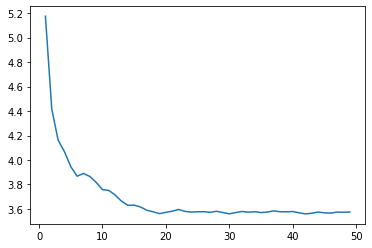

In [ ]:
plt.plot(np.arange(1,50,1),list(rmse_dict.values()))
plt.show()
# Stabilises at an rmse of 3.8, higher than both Random Forest and Linear Regression

In [ ]:
x_train3 = z_df[(z_df["date"]<=train_till_date)&(z_df["year"]>=2000)][["win_rate_z","past_avg_position_z"]]
y_train3 = z_df[(z_df["date"]<=train_till_date)&(z_df["year"]>=2000)]["position"]
x_test3 = z_df[(z_df["date"]>train_till_date)&(z_df["year"]<=2021)][["win_rate_z","past_avg_position_z"]]
y_test3 = z_df[(z_df["date"]>train_till_date)&(z_df["year"]<=2021)]["position"]

from sklearn.neighbors import KNeighborsRegressor
rmse_dict = dict()
for n in np.arange(1,50,1):
  model4 = KNeighborsRegressor(n_neighbors= n)
  model4.fit(x_train3,np.ravel(y_train3))
  predict_knn = model4.predict(x_test3)
  rmse_dict[n] = sk_m.mean_squared_error(y_test3,predict_knn,squared=False)
  
rmse_dict 
## Goes slghtly lower than knn normal data set to an rmse of 3.78

{1: 5.149940341585087,
 2: 4.413783125786934,
 3: 4.2065098392917575,
 4: 4.069291461253789,
 5: 3.965966324729559,
 6: 3.870930154611168,
 7: 3.8517322605900293,
 8: 3.828011512266798,
 9: 3.7775742116321043,
 10: 3.758742894658818,
 11: 3.6946431734761345,
 12: 3.65129801292628,
 13: 3.6199720712328,
 14: 3.5994523431131693,
 15: 3.587557998217226,
 16: 3.576479600693269,
 17: 3.573565172242453,
 18: 3.5610986066608095,
 19: 3.5669433635175682,
 20: 3.5583117473856185,
 21: 3.5635067934318063,
 22: 3.55893812407567,
 23: 3.5617004765917843,
 24: 3.564290321728615,
 25: 3.5814178107773933,
 26: 3.5660522189484114,
 27: 3.5630571507011037,
 28: 3.5613886055245683,
 29: 3.5634897257394615,
 30: 3.5691941703714707,
 31: 3.565231502459638,
 32: 3.582485364783629,
 33: 3.568129150824484,
 34: 3.575334206940547,
 35: 3.572221172271007,
 36: 3.5626587705067094,
 37: 3.56498795433372,
 38: 3.558594309554315,
 39: 3.5539386153620796,
 40: 3.562807078146988,
 41: 3.5573226805218114,
 42: 3.5551

In [ ]:
## Statistcal Significance of RMSE between the following models
lin_err = Test14["Error"]
rand_err = y_test-predict_forest
stats.ttest_ind(lin_err, rand_err, equal_var=True)
## Linear Regression is Significantly better than Random Forest

Ttest_indResult(statistic=11.625441824043168, pvalue=2.7810757176263867e-28)

In [ ]:
model5 = KNeighborsRegressor(n_neighbors= 47)
model5.fit(x_train3,np.ravel(y_train3))
predict_knn = model5.predict(x_test3)

knn_err = y_test3 - predict_knn
stats.ttest_ind(lin_err, knn_err, equal_var=True)
## Statistically significant difference between knn and linear regression

Ttest_indResult(statistic=11.191028790768279, pvalue=1.6666986129945921e-26)

Make predictions for past and 2021 season

In [ ]:
first_5_race_results = pd.DataFrame(Train14[Train14["year"]==2021].groupby("driverId").sum()[["points"]]).reset_index().sort_values(by="points",ascending=False)
first_5_race_results

,driverId,points
7,830,105.0
0,1,101.0
14,846,56.0
6,822,47.0
4,815,44.0
13,844,40.0
8,832,38.0
5,817,24.0
12,842,16.0
9,839,12.0


In [ ]:
Test14

,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos,constructor_home_adv,Pred_position,Error
14283,2021-06-06,2021,1057,3,815,19,25.0,1,0.052632,6.315789,0,6.660046,5.660046
14284,2021-06-06,2021,1057,7,20,20,18.0,2,0.000000,10.850000,0,10.793220,8.793220
14285,2021-06-06,2021,1057,6,842,19,15.0,3,0.052632,8.736842,0,8.829951,5.829951
14286,2021-06-06,2021,1057,2,844,17,12.0,4,0.000000,6.529412,0,6.920828,2.920828
14287,2021-06-06,2021,1057,5,846,21,10.0,5,0.000000,7.047619,0,7.385279,2.385279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,2021-12-12,2021,1073,7,20,19,0.0,11,0.000000,11.210526,0,11.116348,0.116348
14576,2021-12-12,2021,1073,5,817,21,0.0,12,0.047619,7.857143,0,8.048109,3.951891
14577,2021-12-12,2021,1073,7,840,19,0.0,13,0.000000,10.631579,0,10.597457,2.402543
14578,2021-12-12,2021,1073,10,854,18,0.0,14,0.000000,16.611111,0,15.956704,1.956704


In [ ]:
rem_races = pd.DataFrame(predict_positions(Test14,"Pred_position",type="position").groupby("driverId").sum()["points_predicted"]).reset_index().sort_values(by="points_predicted", ascending=False)
rem_races

,driverId,points_predicted
8,830,336
0,1,316
7,822,241
9,832,187
5,815,161
15,846,157
14,844,124
6,817,86
13,842,44
10,839,25


In [ ]:
result_2021 = rem_races.merge(first_5_race_results,how="left",on="driverId")
result_2021["total_predicted_points"] = result_2021["points_predicted"] + result_2021["points"]
result_2021 = result_2021.merge(drivers[["driverId","surname"]],how="left",on="driverId")
result_2021 = result_2021.sort_values(by="total_predicted_points", ascending=False)
result_2021

,driverId,points_predicted,points,total_predicted_points,surname
0,830,336,105.0,441.0,Verstappen
1,1,316,101.0,417.0,Hamilton
2,822,241,47.0,288.0,Bottas
3,832,187,38.0,225.0,Sainz
5,846,157,56.0,213.0,Norris
4,815,161,44.0,205.0,Pérez
6,844,124,40.0,164.0,Leclerc
7,817,86,24.0,110.0,Ricciardo
8,842,44,16.0,60.0,Gasly
9,839,25,12.0,37.0,Ocon


In [ ]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [ ]:
def dumb_model_df(df):
  final_df = pd.DataFrame()
  import random
  random.seed(1)
  x = np.arange(1,len(df)+1,1)
  y = list(x)
  random.shuffle(y)
  df["random"] = y
  for i in df["raceId"].unique():
    #print(i)
    df1 = df[df["raceId"]==i].copy()
    points_list = [25,18,15,12,10,8,6,4,2,1] + [0]*(len(df1)-10)
    position_list = np.arange(1,len(df1)+1,1)
    df2 = df1.sort_values(by="random",ascending=True)
    #df2["points_predicted"] = np.array(points_list)
    df2["position_predicted"] = np.array(position_list)
    
    final_df = pd.concat([final_df,df2])

  return final_df

In [ ]:
Train16 = final_df[(final_df["date"]<=train_till_date)&(final_df["year"]>=2000)].copy()
Test16 = final_df[(final_df["date"]>train_till_date)&(final_df["year"]<=2021)].copy()
dumb_df = dumb_model_df(Test14)
dumb_df

<ipython-input-217-3889df6880b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["random"] = y


,date,year,raceId,constructorId,driverId,Past_n_year_races,points,position,win_rate,Past_n_year_avg_pos,constructor_home_adv,Pred_position,Error,random,position_predicted
14296,2021-06-06,2021,1057,10,853,4,0.0,14,0.000000,18.000000,0,17.201516,3.201516,18,1
14285,2021-06-06,2021,1057,6,842,19,15.0,3,0.052632,8.736842,0,8.829951,5.829951,43,2
14290,2021-06-06,2021,1057,2,832,19,4.0,8,0.000000,6.736842,0,7.106740,0.893260,71,3
14293,2021-06-06,2021,1057,8,841,19,0.0,11,0.000000,13.526316,0,13.191909,2.191909,87,4
14286,2021-06-06,2021,1057,2,844,17,12.0,4,0.000000,6.529412,0,6.920828,2.920828,127,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,2021-12-12,2021,1073,4,839,19,2.0,9,0.052632,9.157895,0,9.207326,0.207326,231,11
14572,2021-12-12,2021,1073,4,4,19,4.0,8,0.000000,9.105263,0,9.229474,1.229474,242,12
14568,2021-12-12,2021,1073,6,852,17,12.0,4,0.000000,12.176471,0,11.982090,7.982090,250,13
14574,2021-12-12,2021,1073,2,844,20,1.0,10,0.000000,6.750000,0,7.118533,2.881467,254,14


In [ ]:
dumb_df["Error"] = np.sqrt((dumb_df["position"] - dumb_df["position_predicted"])**2)
rmse = np.mean(dumb_df["Error"])
rmse

5.858585858585859

In [ ]:
# statistical significance dumb and linear
stats.ttest_ind(lin_err, dumb_df["Error"], equal_var=True)

Ttest_indResult(statistic=-11.296531234158959, pvalue=6.223569192451805e-27)